In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import missingno as msno
from sklearn.impute import KNNImputer


raw_path = "/Housing.csv"
df_raw = pd.read_csv(raw_path)
df = df_raw.copy()
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Verificar valores ausentes
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

In [ ]:
print(pd.concat([missing_values, missing_percentage.round(2)],axis=1, keys=["Total","%"]))

                  Total    %
price                 0  0.0
area                  0  0.0
bedrooms              0  0.0
bathrooms             0  0.0
stories               0  0.0
mainroad              0  0.0
guestroom             0  0.0
basement              0  0.0
hotwaterheating       0  0.0
airconditioning       0  0.0
parking               0  0.0
prefarea              0  0.0
furnishingstatus      0  0.0


<Figure size 1000x500 with 0 Axes>

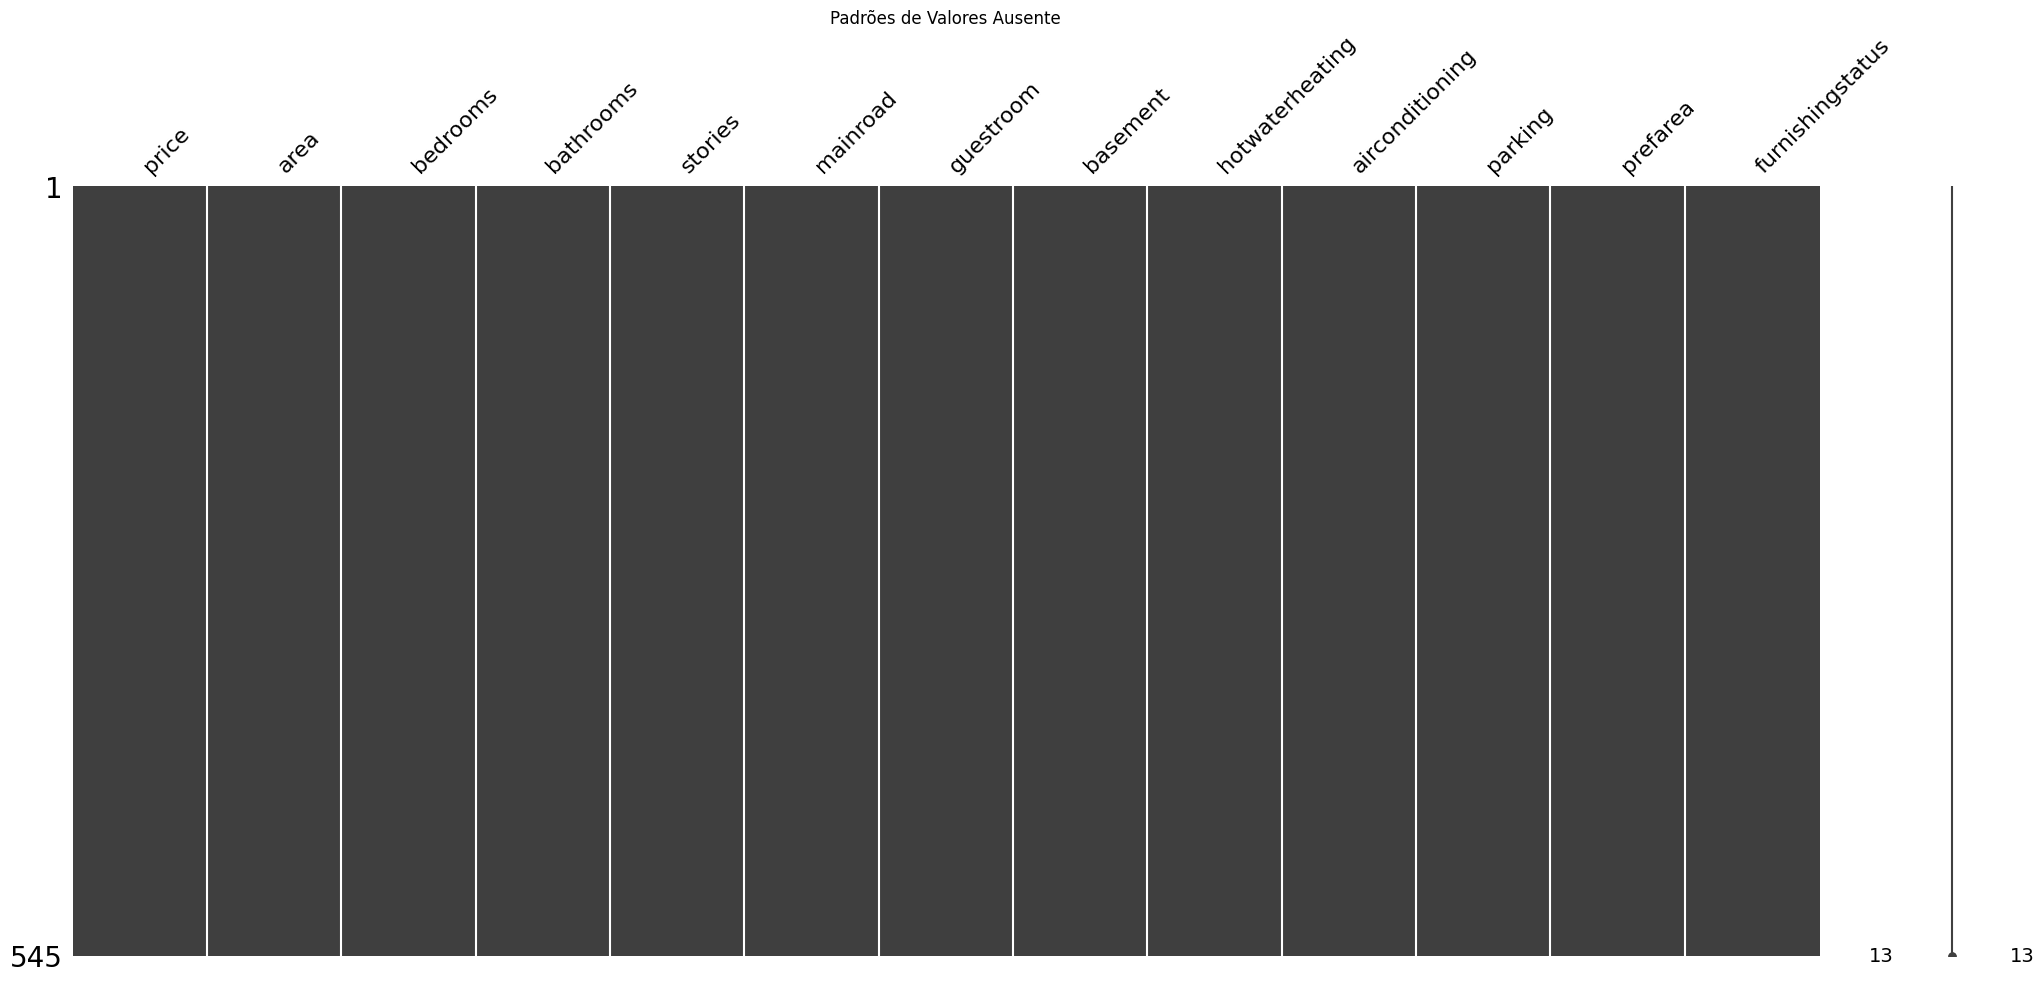

In [ ]:
plt.figure(figsize=(10,5))
msno.matrix(df)
plt.title("Padrões de Valores Ausente")
plt.show()

In [ ]:
df_drop = df.dropna()
print(f"Linhas restantes: {len(df_drop)}")

Linhas restantes: 545


In [ ]:
df_mean = df.copy()
for col in df_mean.select_dtypes(include=['float64', 'int64']).columns:
    df_mean[col].fillna(df_mean[col].mean(), inplace=True)

df_median = df.copy()
for col in df_median.select_dtypes(include=['float64', 'int64']).columns:
    df_median[col].fillna(df_median[col].median(), inplace=True)

/tmp/ipython-input-148743132.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean[col].fillna(df_mean[col].mean(), inplace=True)
/tmp/ipython-input-148743132.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
df_knn = df.copy()
imputer = KNNImputer(n_neighbors=5)
df_knn[df_knn.select_dtypes(include=['float64', 'int64']).columns] = imputer.fit_transform(
    df_knn.select_dtypes(include=['float64', 'int64'])
)

In [ ]:
print(df.describe())
print(df_mean.describe())
print(df_knn.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e